In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [24]:
data = pd.read_csv("./Dataset/sml2010/NEW-DATA-1.T15.txt",sep=r'\s+')
data.drop(columns = ['1:Date', '2:Time'], axis=1, inplace = True)
data.drop(columns = [data.columns[16], data.columns[17], data.columns[18]], axis=1, inplace=True)
data.dropna(inplace = True)
data.reset_index(inplace = True)
data = (data - data.mean()) / data.std()

In [33]:
data

,index,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,13:Meteo_Exterior_Crepusculo,14:Meteo_Exterior_Viento,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,-1.731111,-0.354753,-0.353523,-3.331119,0.298930,0.381260,-0.753847,-0.649160,2.357223,1.719682,-0.227538,0.976818,0.273593,-0.202063,0.016371,2.243676,1.829770,0.349253,-0.584272,-0.981243
1,-1.729858,-0.258094,-0.249595,-1.701201,0.424223,0.326570,-0.751691,-0.671614,2.360498,1.721691,-0.227538,0.976330,0.416323,-0.150771,-0.067137,2.243676,1.840499,0.426379,-0.627821,-0.981243
2,-1.728605,-0.151551,-0.137585,0.743675,0.404099,0.276340,-0.775175,-0.674075,2.346879,1.721573,-0.227538,0.974510,0.674081,-0.037595,-0.118499,2.242508,1.854569,0.539250,-0.656701,-0.981243
3,-1.727352,-0.044517,-0.026071,0.983369,0.374875,0.210022,-0.774568,-0.691011,2.350197,1.715524,-0.227538,0.974232,0.619546,0.137674,-0.119487,2.241337,1.853849,0.651811,-0.688038,-0.981243
4,-1.726099,0.060413,0.076758,1.462756,0.341619,0.176126,-0.774613,-0.694994,2.348669,1.708200,-0.227538,0.973671,1.078272,0.439546,-0.139700,2.241172,1.842767,0.767435,-0.807066,-0.981243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,1.726099,0.684214,0.706743,-0.215100,-0.663646,-0.663344,-0.541397,-0.745352,-0.656811,-0.656630,-0.227538,0.220393,-0.890278,-0.575281,-0.562905,-0.674043,-0.734923,-0.035989,-0.513532,-0.479184
2760,1.727352,0.645417,0.666547,-0.422843,-0.668011,-0.632223,-0.540592,-0.741118,-0.646339,-0.505895,-0.227538,0.943251,-0.954575,-0.557336,-0.438050,-0.658045,-0.710410,-0.091755,-0.456595,-0.479184
2761,1.728605,0.608057,0.623090,-0.454794,-0.667604,-0.611639,-0.538163,-0.736183,-0.309320,-0.413217,-0.227538,0.945490,-0.687054,-0.442213,0.181804,-0.571703,-0.633104,-0.127937,-0.454951,-0.479184
2762,1.729858,0.580475,0.600865,-0.454794,-0.626949,-0.620983,-0.541807,-0.729117,-0.247230,-0.408556,-0.227538,0.950735,-0.696814,-0.313563,1.197465,-0.456654,-0.498128,-0.134113,-0.471749,-0.479184


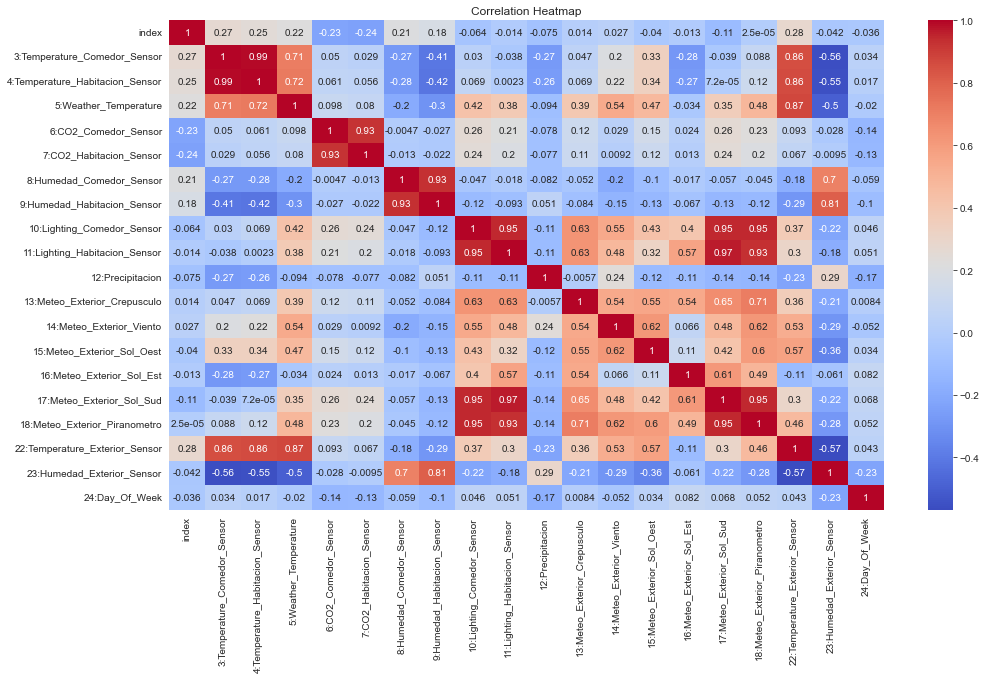

In [26]:
plt.figure(figsize = (16, 9))
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
import statsmodels.api as sm

input_features = ['10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor', '17:Meteo_Exterior_Sol_Sud']
target_feature = '18:Meteo_Exterior_Piranometro'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

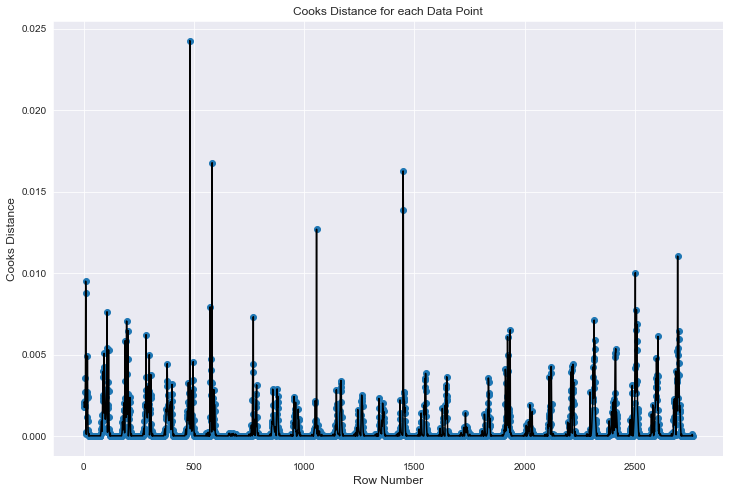

In [29]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [35]:
data1 = data[['10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor', '17:Meteo_Exterior_Sol_Sud', '18:Meteo_Exterior_Piranometro']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro
0,2.357223,1.719682,2.243676,1.829770
1,2.360498,1.721691,2.243676,1.840499
5,2.339097,1.721573,2.241172,1.808921
6,2.344132,1.706948,2.241172,1.769444
7,2.329710,1.666264,2.235663,1.702695
...,...,...,...,...
2698,0.962009,0.913560,0.562315,1.805294
2699,1.040697,0.574101,0.414027,1.714612
2700,0.792612,0.288886,0.303747,1.636522
2701,0.570395,0.174820,0.092037,1.374119


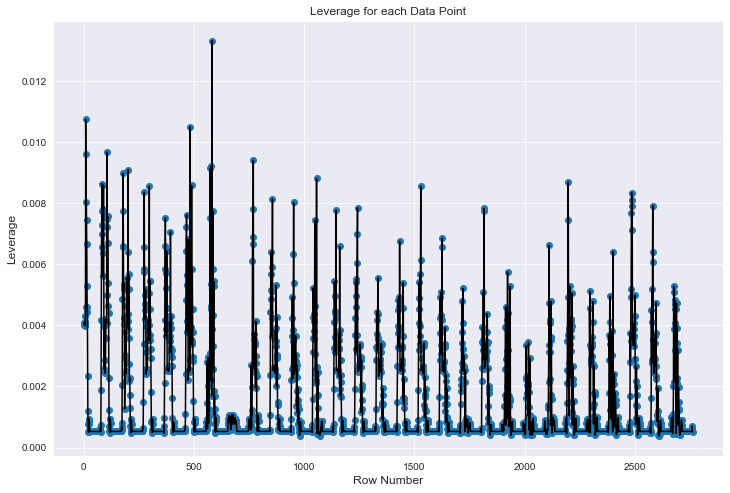

In [36]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [38]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro
8,2.333144,1.006994,2.133980,1.629632
9,2.336462,1.007120,1.992394,1.556568
11,1.051226,0.454080,1.630498,1.347995
12,0.713692,0.285673,1.420622,1.237607
13,0.408608,0.116763,1.178771,1.108631
...,...,...,...,...
2488,1.058552,2.400114,1.786190,1.721071
2489,1.143824,2.398720,1.847050,1.837199
2581,0.658066,1.866353,1.208325,1.100486
2582,1.062673,2.368479,1.624652,1.599056


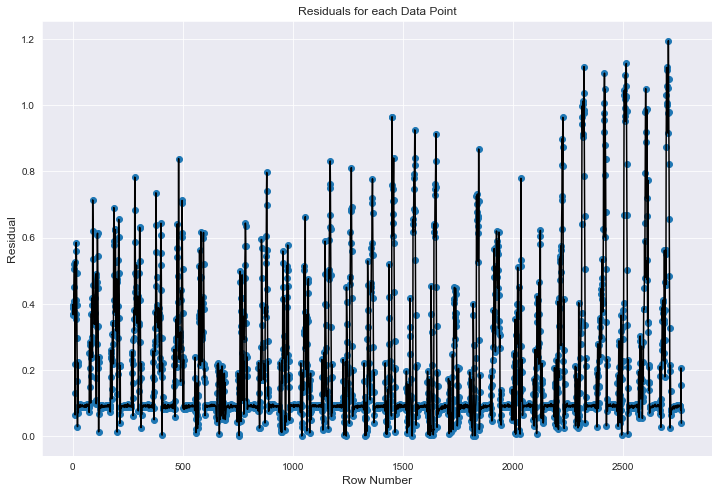

In [39]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [51]:
outlier_points = data1.index[residuals > (4 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro
0,2.357223,1.719682,2.243676,1.829770
1,2.360498,1.721691,2.243676,1.840499
364,-0.254184,-0.390506,-0.358280,-0.556722
386,2.346879,2.405784,2.246513,1.874089
387,2.346763,2.019710,2.247849,1.897343
388,2.343329,1.707586,2.246015,1.894043
389,2.328796,1.703546,2.246180,1.863323
390,2.333028,1.708342,2.197928,1.805762
391,2.325362,1.697261,2.070867,1.764566
392,2.319293,1.608805,1.919681,1.682314


In [52]:
input_features = ['3:Temperature_Comedor_Sensor', '4:Temperature_Habitacion_Sensor', '5:Weather_Temperature']
target_feature = '22:Temperature_Exterior_Sensor'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

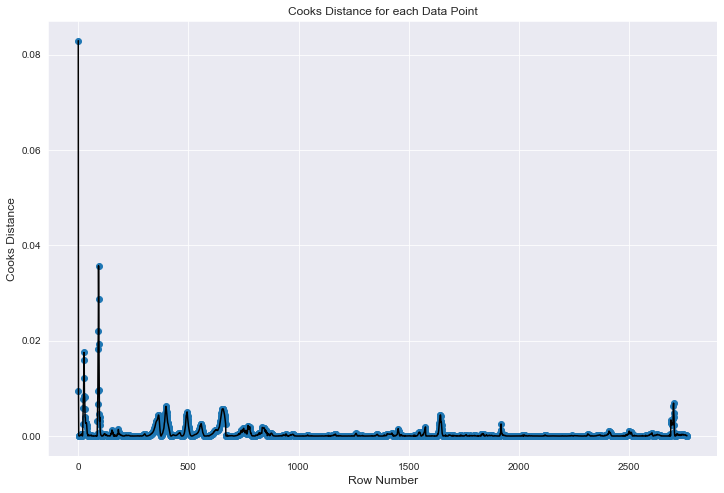

In [53]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [54]:
data1 = data[['10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor', '17:Meteo_Exterior_Sol_Sud', '18:Meteo_Exterior_Piranometro']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro
0,2.357223,1.719682,2.243676,1.829770
1,2.360498,1.721691,2.243676,1.840499
21,-0.257673,-0.424055,-0.365073,-0.138527
22,-0.253467,-0.405123,-0.474185,-0.382749
23,-0.250003,-0.413628,-0.611587,-0.640387
...,...,...,...,...
2701,0.570395,0.174820,0.092037,1.374119
2702,0.411299,-0.011196,-0.053016,1.149542
2703,0.060202,-0.108126,-0.177320,0.857913
2704,-0.108105,-0.192361,-0.211298,1.039083


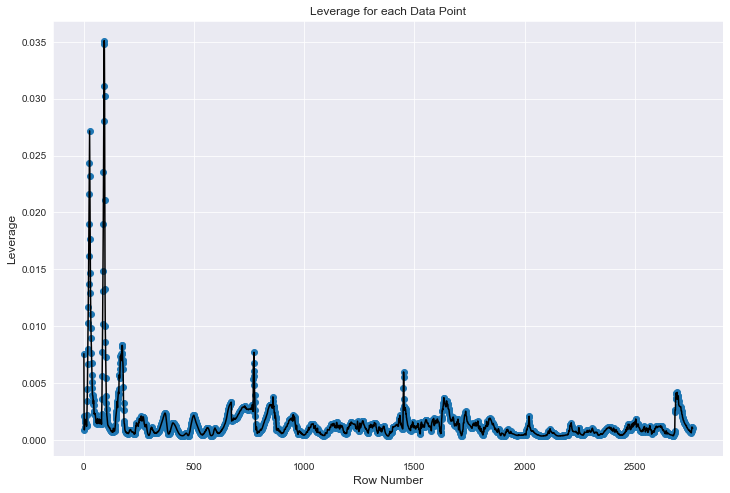

In [55]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [56]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro
0,2.357223,1.719682,2.243676,1.829770
17,-0.254239,-0.408556,0.190253,0.517797
18,-0.254184,-0.408556,-0.017451,0.354731
19,-0.235298,-0.436813,-0.175149,0.190802
20,-0.268888,-0.408556,-0.282947,0.025007
21,-0.257673,-0.424055,-0.365073,-0.138527
22,-0.253467,-0.405123,-0.474185,-0.382749
23,-0.250003,-0.413628,-0.611587,-0.640387
24,-0.313527,-0.413217,-0.627804,-0.670986
25,-0.650545,-0.456250,-0.665058,-0.706516


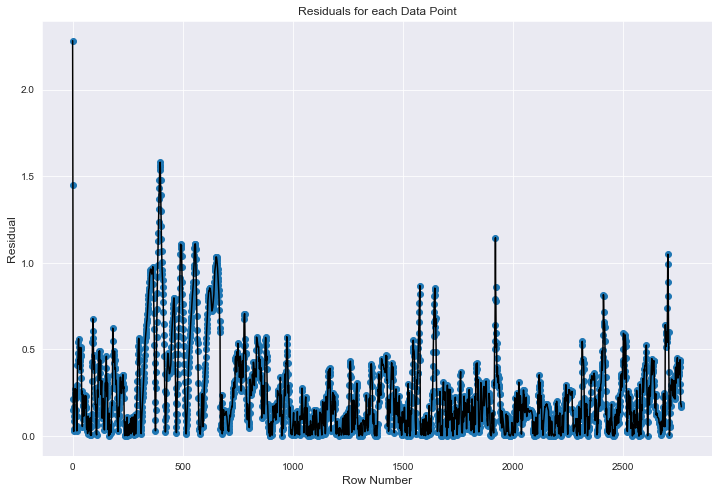

In [57]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [58]:
outlier_points = data1.index[residuals > (4 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro
0,2.357223,1.719682,2.243676,1.829770
1,2.360498,1.721691,2.243676,1.840499
364,-0.254184,-0.390506,-0.358280,-0.556722
386,2.346879,2.405784,2.246513,1.874089
387,2.346763,2.019710,2.247849,1.897343
388,2.343329,1.707586,2.246015,1.894043
389,2.328796,1.703546,2.246180,1.863323
390,2.333028,1.708342,2.197928,1.805762
391,2.325362,1.697261,2.070867,1.764566
392,2.319293,1.608805,1.919681,1.682314
